# The purpose of this notebook is to experiment with different ways of fitting Henry coefficients from adsorption isotherms

In [1]:
import json
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import pprint
import os
import pygaps
import scipy

## We load 24 isotherms that have been used to manually fit Henry coefficients

In [40]:
files = [file for file in os.listdir('expt_data') if file.endswith('.csv')]
files

['NOTT-300-CO2_293.csv',
 'Co-CN6-CO2_298.csv',
 'MFM601-CO2_298.csv',
 'Zn-bdc-ted-SO2_298.csv',
 'NOTT-300-SO2_293.csv',
 'Zn-bdc-ted-CO2_298.csv',
 'Zn-CN6-CO2_298.csv',
 'KAUST7-SO2_298.csv',
 'MFM-300-In-SO2_298.csv',
 'NOTT-202a-SO2_293.csv',
 'KAUST8-CO2_298.csv',
 'Mg-MOF-74-CO2_293.csv',
 'Ni-bdc-ted-SO2_298.csv',
 'MFM600-SO2_298.csv',
 'MFM601-SO2_298.csv',
 'KAUST8-SO2_298.csv',
 'MFM600-CO2_298.csv',
 'MFM-300-In-CO2_298.csv',
 'NOTT-202a-CO2_293.csv',
 'KAUST7-CO2_298.csv',
 'Mg-MOF-74-SO2_298.csv',
 'Zn-CN6-SO2_298.csv',
 'Co-CN6-SO2_298.csv',
 'Ni-bdc-ted-CO2_298.csv']

In [41]:
nb_pts_to_incl_in_fitting = {}
nb_pts_to_incl_in_fitting["Co-CN6-CO2_298.csv"] = 2
nb_pts_to_incl_in_fitting["Co-CN6-SO2_298.csv"] = 2
nb_pts_to_incl_in_fitting["MFM-300-In-CO2_298.csv"] = 3
nb_pts_to_incl_in_fitting["MFM-300-In-SO2_298.csv"] = 3
nb_pts_to_incl_in_fitting["MFM600-CO2_298.csv"] = 3
nb_pts_to_incl_in_fitting["MFM600-SO2_298.csv"] = 2
nb_pts_to_incl_in_fitting["MFM601-CO2_298.csv"] = 2
nb_pts_to_incl_in_fitting["MFM601-SO2_298.csv"] = 2
nb_pts_to_incl_in_fitting["Ni-bdc-ted-CO2_298.csv"] = 2
nb_pts_to_incl_in_fitting["Ni-bdc-ted-SO2_298.csv"] = 4
nb_pts_to_incl_in_fitting["NOTT-202a-CO2_293.csv"] = 3
nb_pts_to_incl_in_fitting["NOTT-202a-SO2_293.csv"] = 2
nb_pts_to_incl_in_fitting["NOTT-300-CO2_293.csv"] = 4
nb_pts_to_incl_in_fitting["NOTT-300-SO2_293.csv"] = 4
nb_pts_to_incl_in_fitting["Zn-bdc-ted-CO2_298.csv"] = 6
nb_pts_to_incl_in_fitting["Zn-bdc-ted-SO2_298.csv"] = 2
nb_pts_to_incl_in_fitting["Zn-CN6-CO2_298.csv"] = 2
nb_pts_to_incl_in_fitting["Zn-CN6-SO2_298.csv"] = 2
nb_pts_to_incl_in_fitting["Mg-MOF-74-CO2_293.csv"] = 4
nb_pts_to_incl_in_fitting["Mg-MOF-74-SO2_298.csv"] = 2
nb_pts_to_incl_in_fitting["mgmof74-CO2_303.csv"] = 4
nb_pts_to_incl_in_fitting["mgmof74-CO2_293.csv"] = 4
nb_pts_to_incl_in_fitting["KAUST7-CO2_298.csv"] = 4
nb_pts_to_incl_in_fitting["KAUST7-SO2_298.csv"] = 3
nb_pts_to_incl_in_fitting["KAUST8-CO2_298.csv"] = 4
nb_pts_to_incl_in_fitting["KAUST8-SO2_298.csv"] = 4

sensing_constants = pd.read_csv('data/henry_constants.csv')
sensing_constants[sensing_constants.crysmption of separationtal == 'MFM601']

,crystal,CO2_henry coefficient [mmol/(g-bar)],CO2_Temperature [K],SO2_henry coefficient [mmol/(g-bar)],SO2_Temperature [K]
0,MFM601,1.370301,298,97.240663,298


##  Lets start by comparing the manually fitted Henry coefficients with [PyGAPS](https://pygaps.readthedocs.io/en/master/)

Calculated K = 6.96046472190639
Starting points: 26
Selected points: 18
Final adjusted root mean square difference: 0.018651316208177126


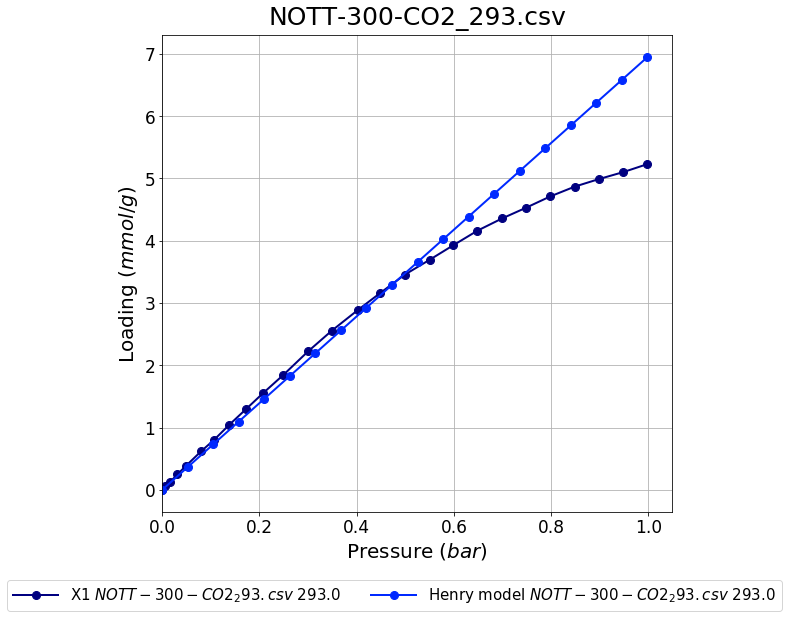

Calculated K = 2.440927439205603
Starting points: 10
Selected points: 2
Final adjusted root mean square difference: 4.16420454127746e-15


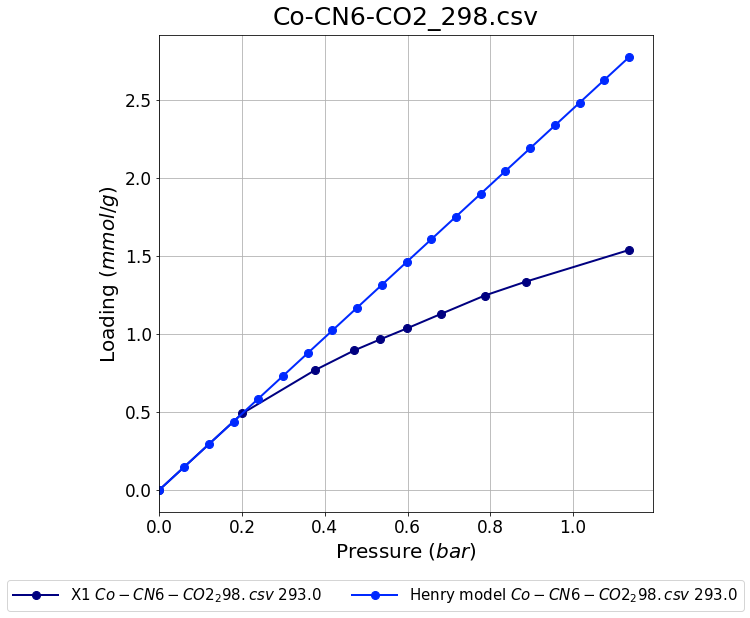

Calculated K = 1.1531688304459184
Starting points: 18
Selected points: 12
Final adjusted root mean square difference: 0.012420800501424465


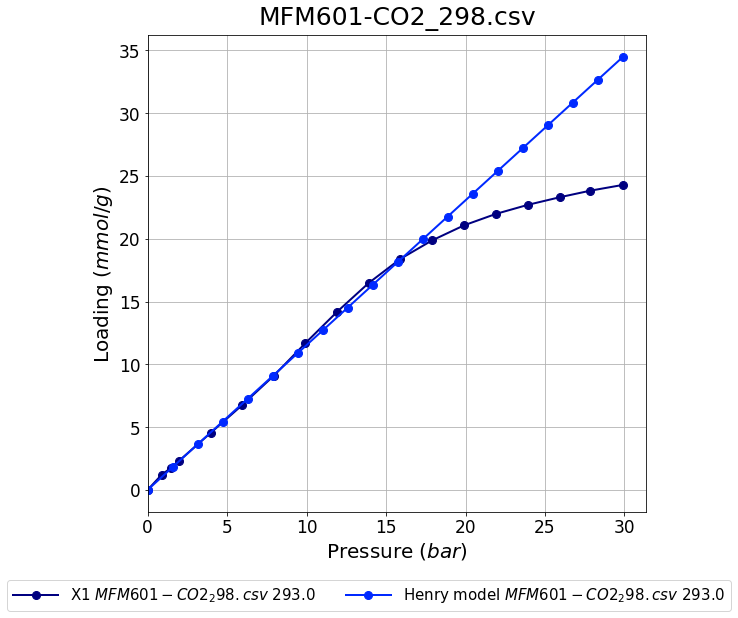

Calculated K = 2.107430955484947
Starting points: 19
Selected points: 8
Final adjusted root mean square difference: 0.01168880662925787


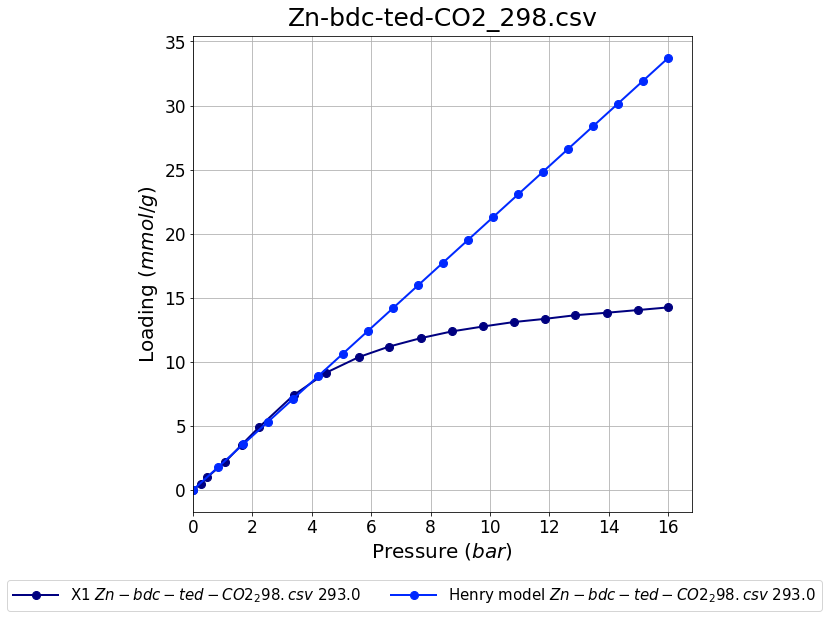

Calculated K = 5.170579516110261
Starting points: 11
Selected points: 2
Final adjusted root mean square difference: 3.787621483177446e-14


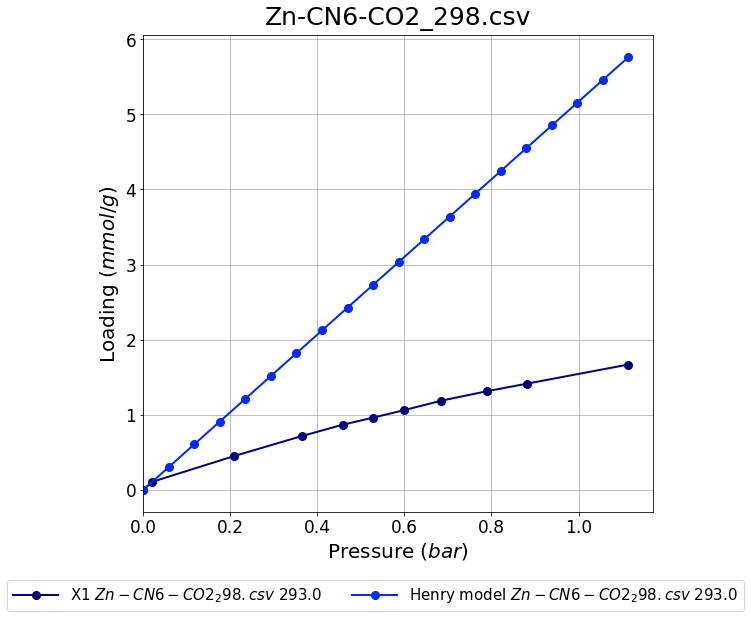

Calculated K = 103.744565829552
Starting points: 30
Selected points: 2
Final adjusted root mean square difference: 1.8471406822201644e-10


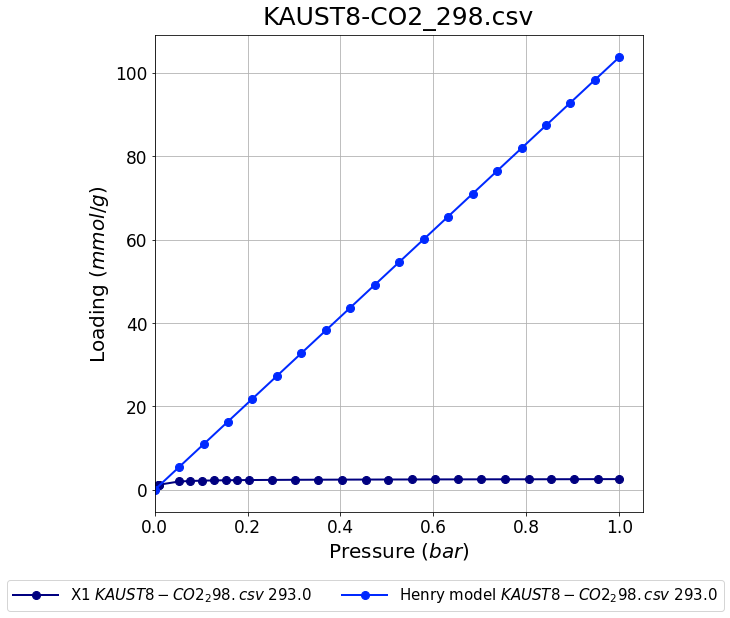

Calculated K = 198.82031983208324
Starting points: 30
Selected points: 4
Final adjusted root mean square difference: 0.014282757109538715


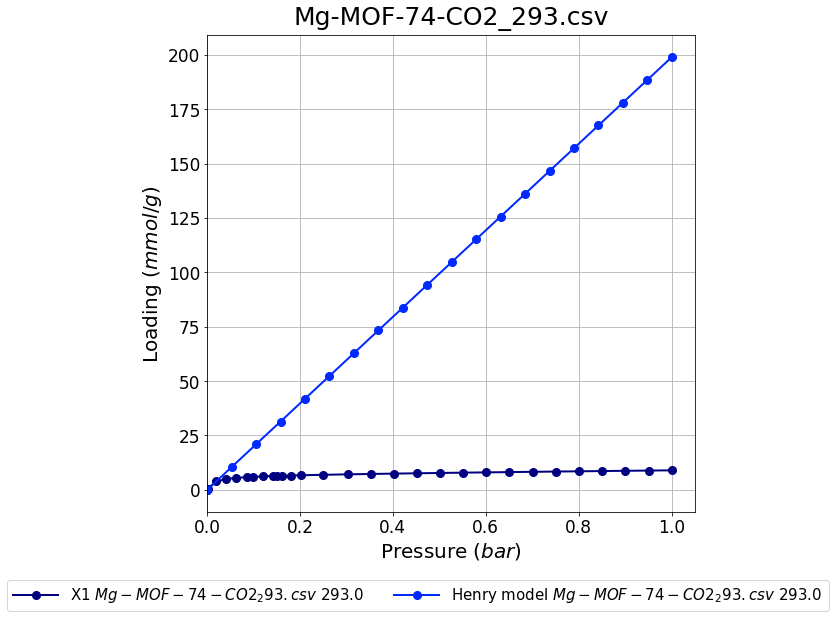

Calculated K = 1.1787965635362088
Starting points: 18
Selected points: 7
Final adjusted root mean square difference: 0.019365020316481654


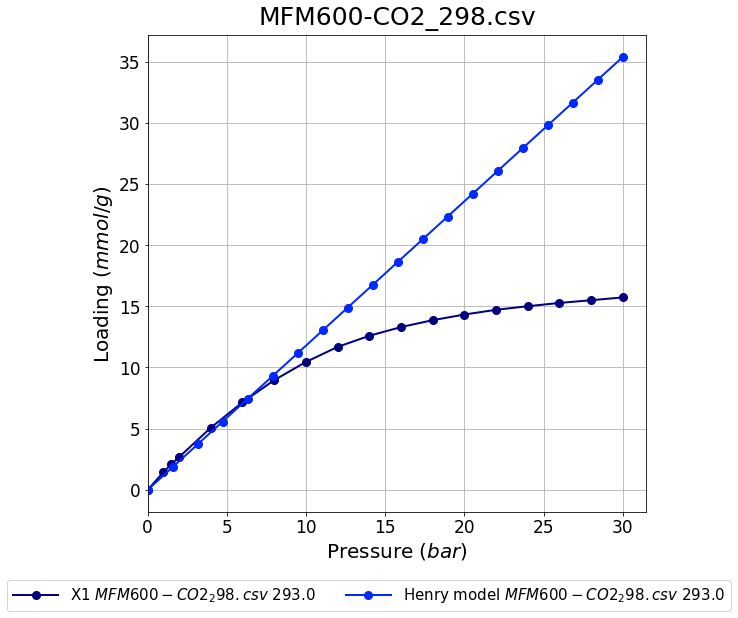

Calculated K = 3.727810796765252
Starting points: 11
Selected points: 11
Final adjusted root mean square difference: 0.012889444511484587


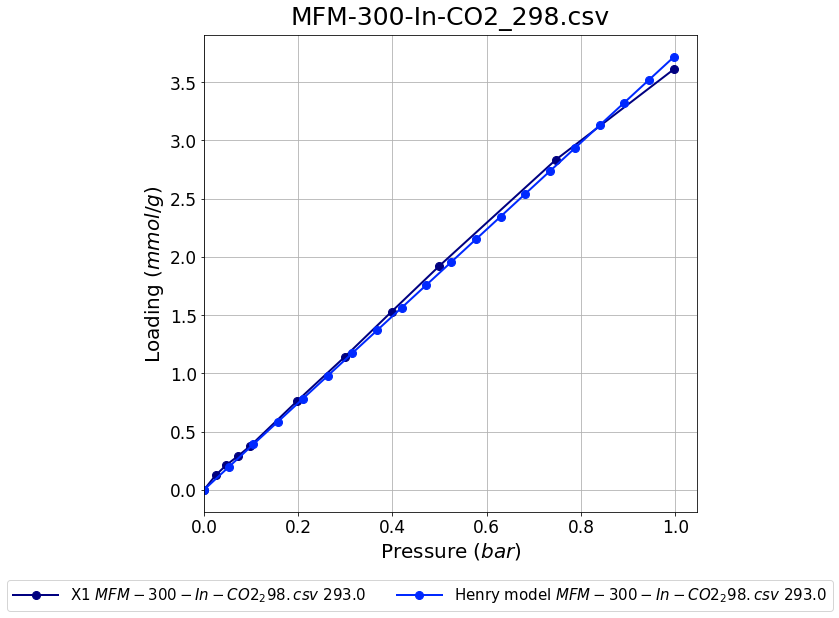

Calculated K = 1.3571508537501957
Starting points: 22
Selected points: 22
Final adjusted root mean square difference: 0.0040000370183754675


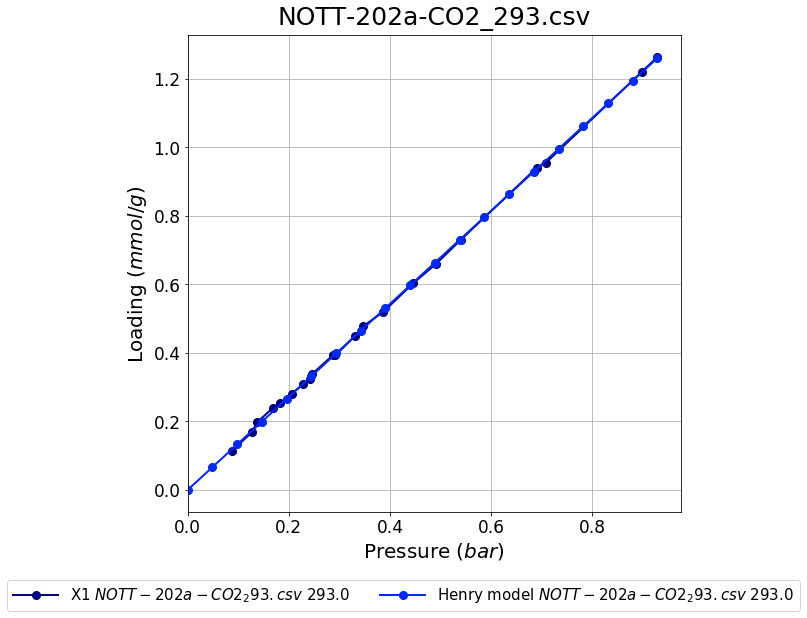

Calculated K = 425.06562500938935
Starting points: 33
Selected points: 2
Final adjusted root mean square difference: 2.2982677275599903e-12


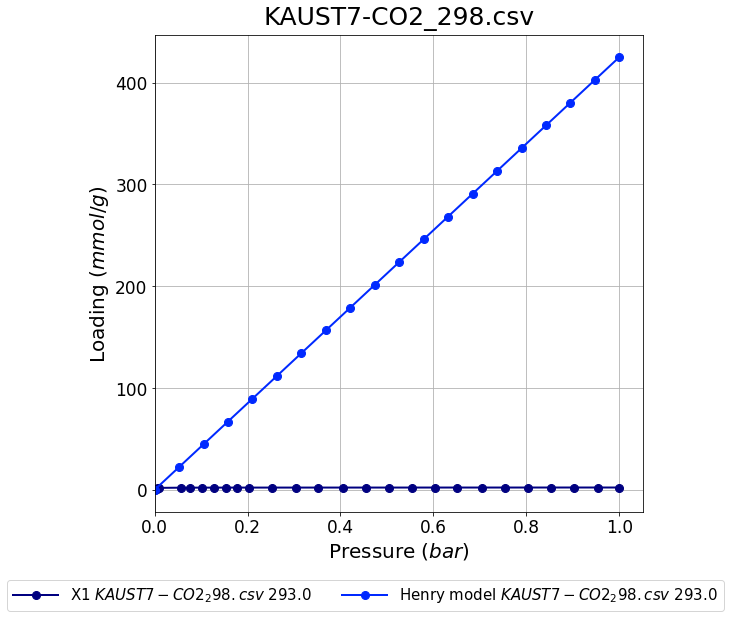

Calculated K = 1.9252969206933264
Starting points: 19
Selected points: 8
Final adjusted root mean square difference: 0.012647570708720784


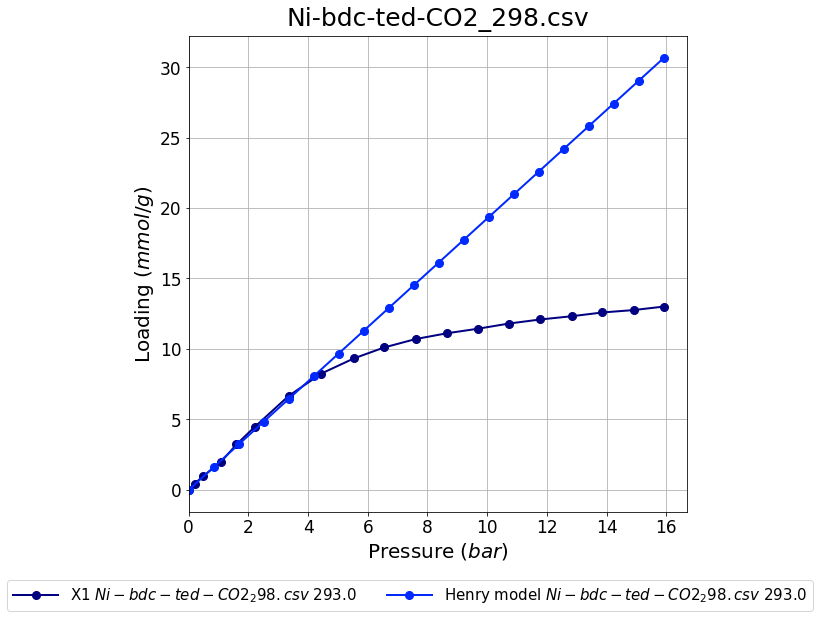

Calculated K = 18.345523504130572
Starting points: 10
Selected points: 3
Final adjusted root mean square difference: 0.008962412727293721


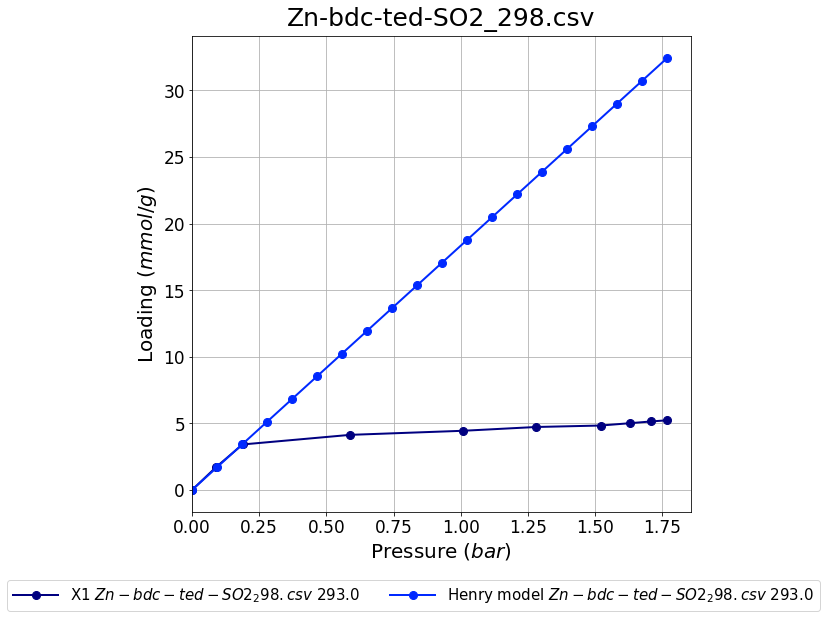

Calculated K = 483.8635912483498
Starting points: 28
Selected points: 4
Final adjusted root mean square difference: 0.017809739290938178


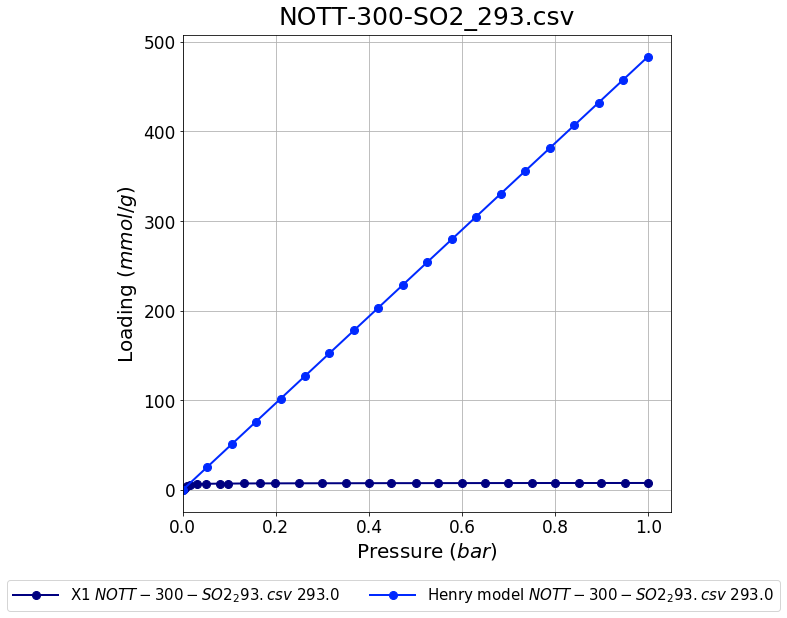

Calculated K = 26.588414310996125
Starting points: 11
Selected points: 4
Final adjusted root mean square difference: 0.007299941055388362


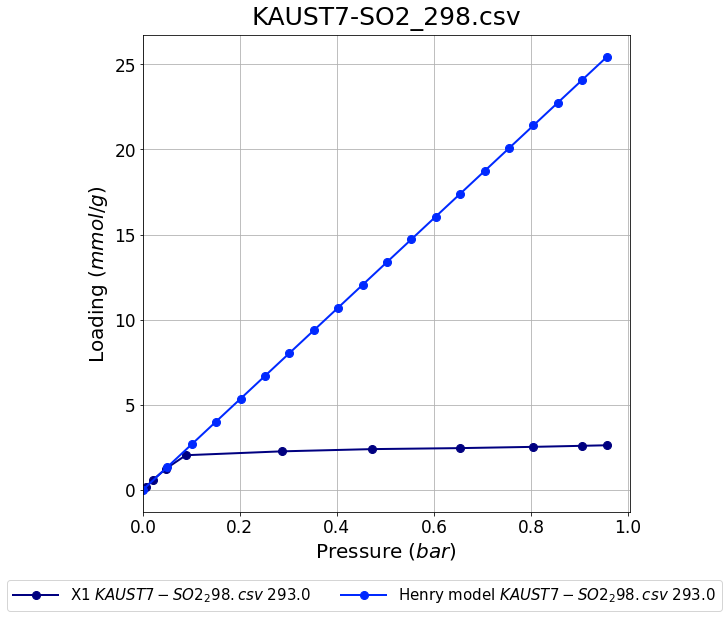

Calculated K = 148.7543281147709
Starting points: 39
Selected points: 8
Final adjusted root mean square difference: 0.01900822639313014


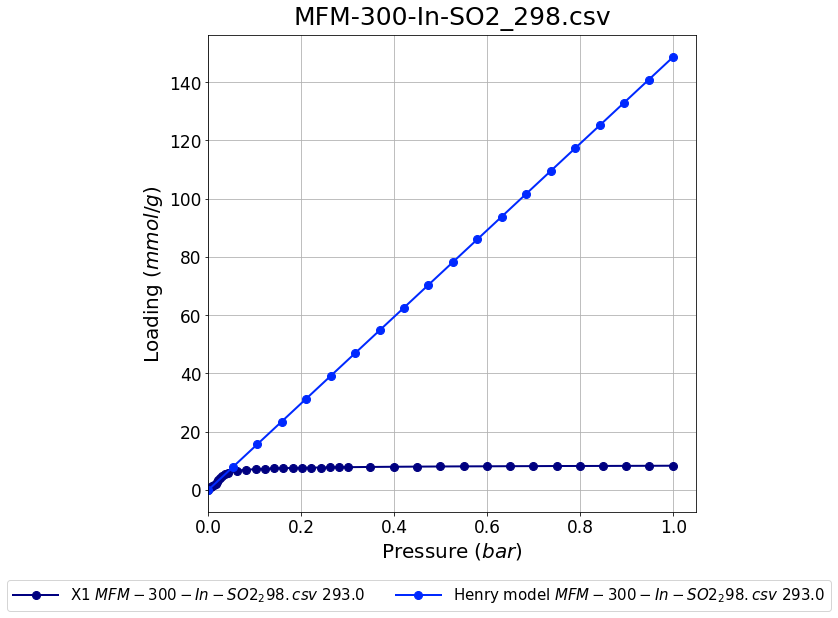

Calculated K = 153.60000018850255
Starting points: 26
Selected points: 2
Final adjusted root mean square difference: 1.2980684166199662e-10


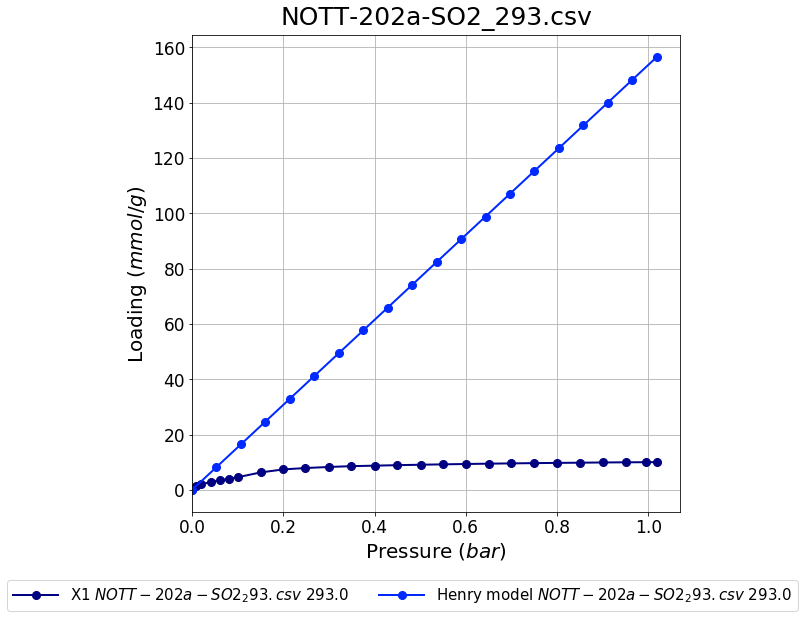

Calculated K = 29.681890225500194
Starting points: 11
Selected points: 2
Final adjusted root mean square difference: 1.136914898135839e-13


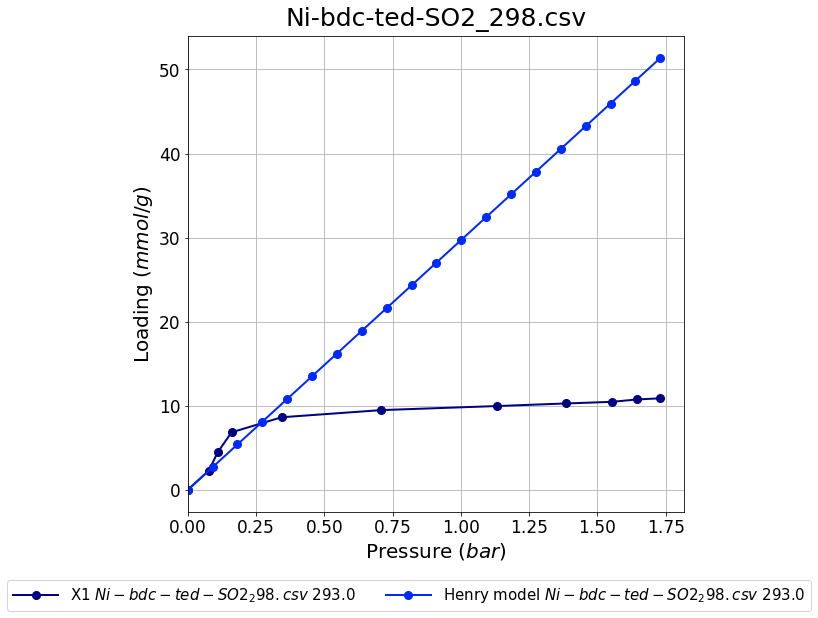

Calculated K = 34.79725440997228
Starting points: 16
Selected points: 2
Final adjusted root mean square difference: 2.9484891332333986e-14


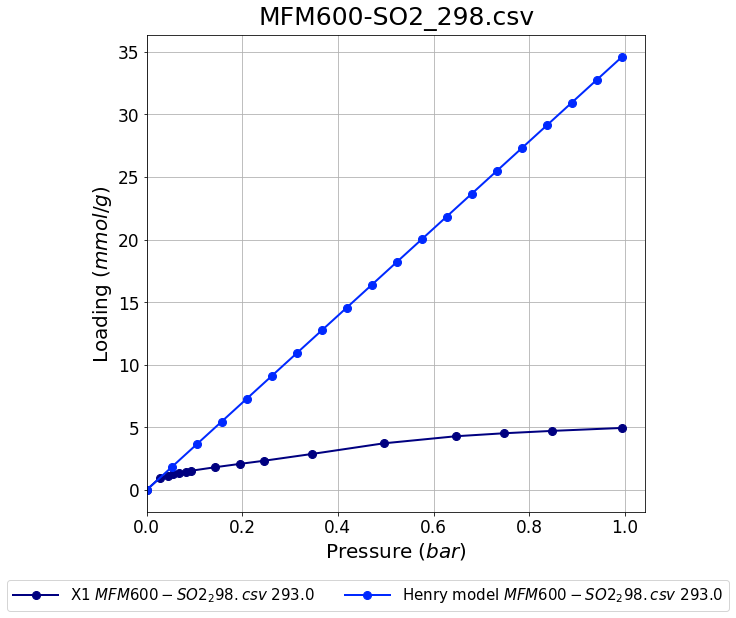

Calculated K = 97.24066284283823
Starting points: 16
Selected points: 2
Final adjusted root mean square difference: 0.0


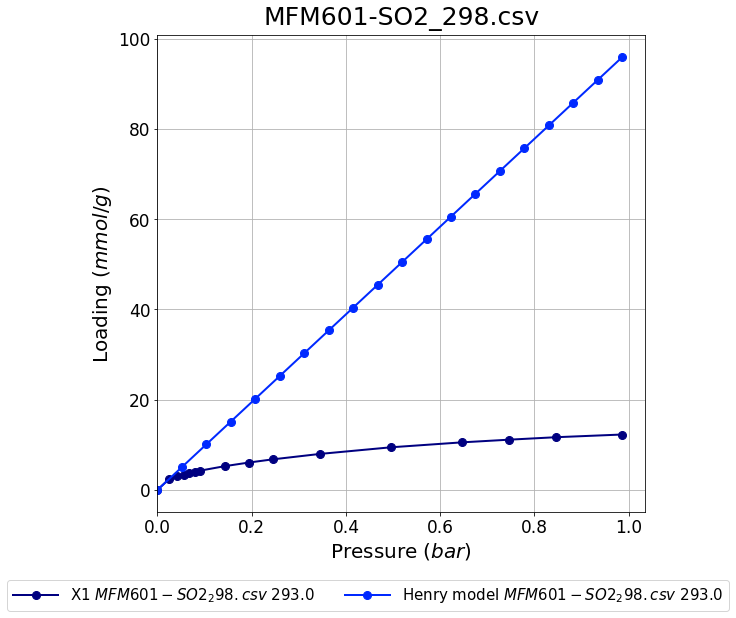

Calculated K = 17.923008229468238
Starting points: 12
Selected points: 6
Final adjusted root mean square difference: 0.00632804082418362


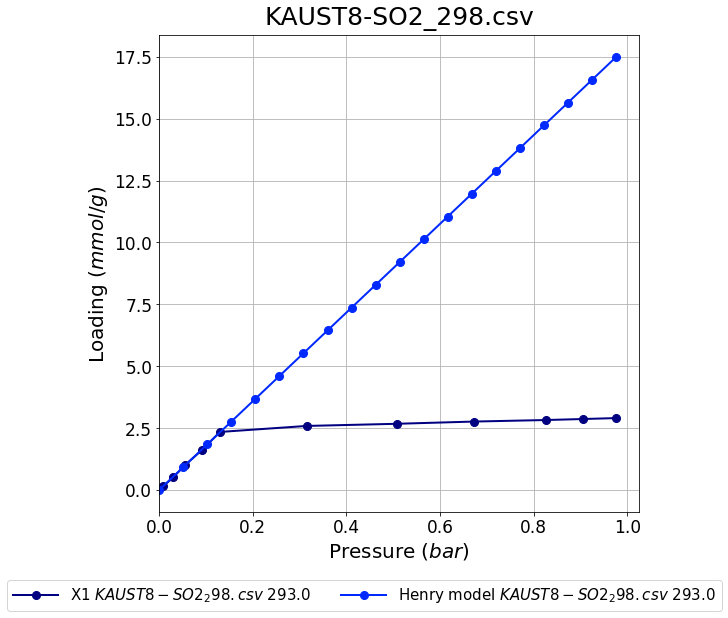

Calculated K = 142.9984035243577
Starting points: 10
Selected points: 3
Final adjusted root mean square difference: 0.004883530721533332


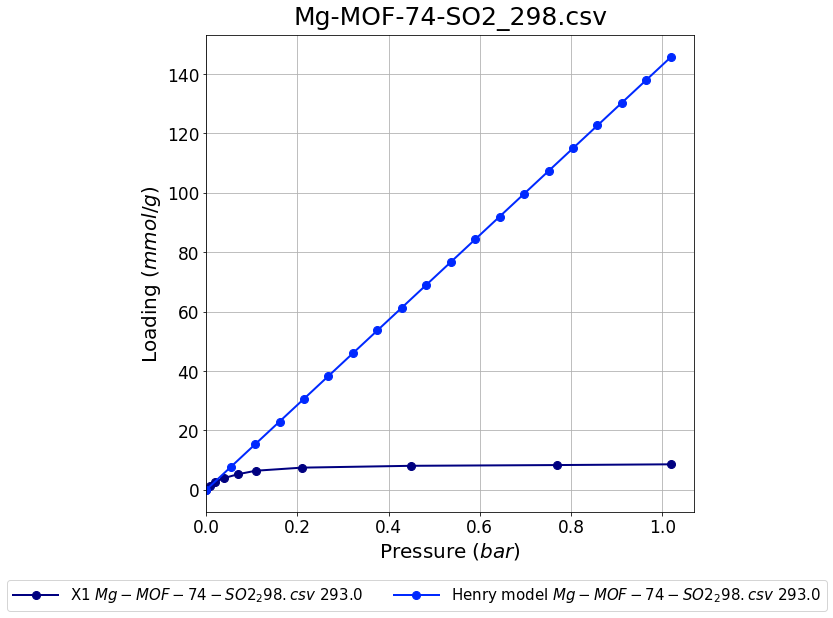

Calculated K = 4.364833666657838
Starting points: 5
Selected points: 2
Final adjusted root mean square difference: 3.699932720762579e-12


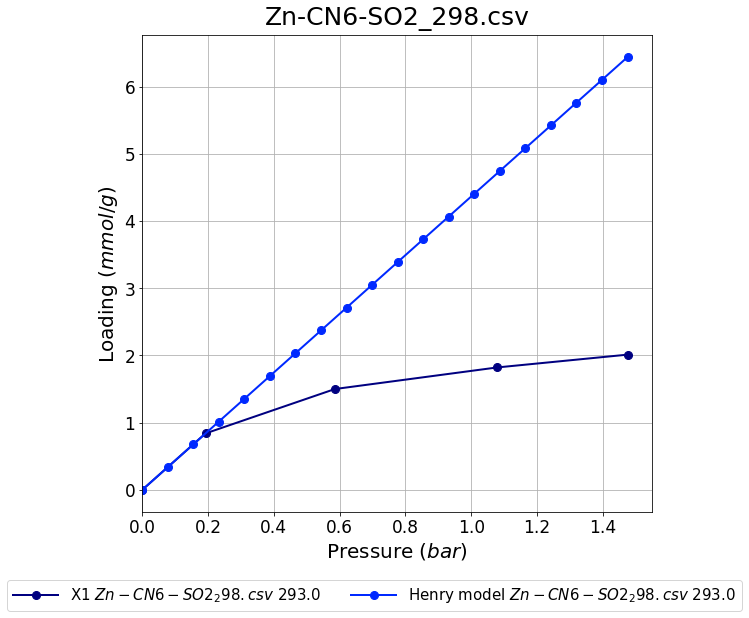

Calculated K = 11.692120591647235
Starting points: 5
Selected points: 2
Final adjusted root mean square difference: 4.430038254767126e-10


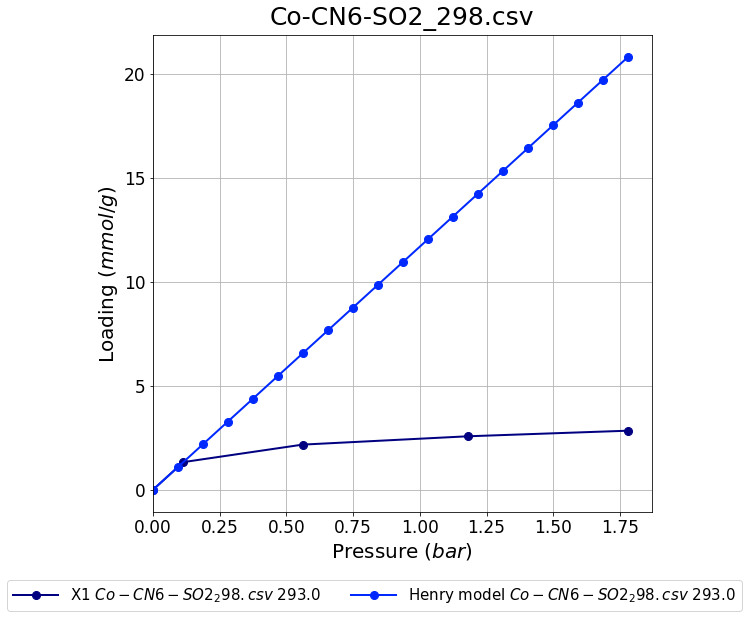

In [43]:
co2_isotherms = []
so2_isotherms = []
for file in files:
    data = pd.read_csv('expt_data/' + file)
    mofstuff = file.split('_')
    gasname = mofstuff[0].split('-')[-1]
    mofname = mofstuff[0][:-4]
    isotherm = pygaps.PointIsotherm(
        pressure=data['Pressure(bar)'],
        loading=data['Adsorption(mmol/g)'],
        material_name=file,
        material_batch='X1',
        adsorbate=file,
        t_iso = 293)
    if gasname == 'SO2':
        so2_isotherms.append(isotherm)
    elif gasname == 'CO2':
        co2_isotherms.append(isotherm)
    else:
        print('Unknown gasname: ' + gasname + '\nIn ' + file)

henries = {}
for isotherm in co2_isotherms:
    file = isotherm.material_name
    mofstuff = file.split('_')
    gasname = mofstuff[0].split('-')[-1]
    mofname = mofstuff[0][:-4]
    if 'co2_' + mofname not in henries.keys():
        henries['co2_' + mofname] = {}
    h1 = pygaps.initial_henry_slope(isotherm, max_adsrms=0.01, logx=False, verbose=True)
    henries['co2_' + mofname]['pygaps'] = h1
    henries['co2_' + mofname]['manual'] = np.float(sensing_constants[sensing_constants.crystal == mofname]['CO2_henry coefficient [mmol/(g-bar)]'])
for isotherm in so2_isotherms:
    file = isotherm.material_name
    mofstuff = file.split('_')
    gasname = mofstuff[0].split('-')[-1]
    mofname = mofstuff[0][:-4]
    if 'so2_' + mofname not in henries.keys():
        henries['so2_' + mofname] = {}
    h1 = pygaps.initial_henry_slope(isotherm, max_adsrms=0.01, logx=False, verbose=True)
    henries['so2_' + mofname]['pygaps'] = h1
    henries['so2_' + mofname]['manual'] = np.float(sensing_constants[sensing_constants.crystal == mofname]['SO2_henry coefficient [mmol/(g-bar)]'])
    


## A comparison between PyGAPS Henry coefficients and manually fitted Henry coefficients

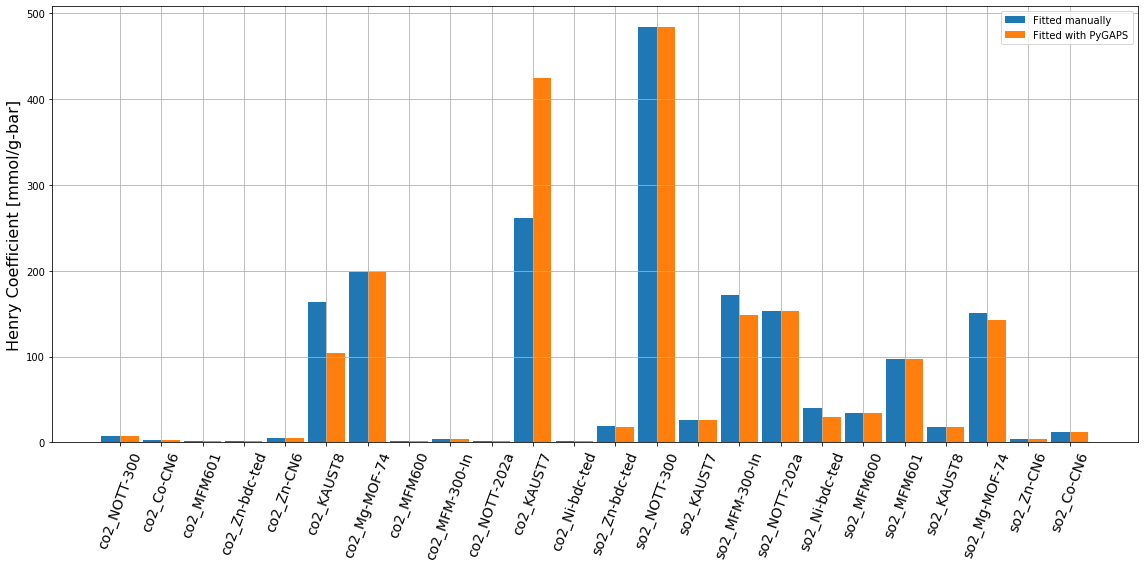

In [44]:
fig = plt.figure(figsize=(16,8))
names = []
manual = []
pygaps = []
for key in henries:
    names.append(key)
    manual.append(henries[key]['manual'])
    pygaps.append(henries[key]['pygaps'])

ind = np.arange(len(names))
width = 0.45
rects1 = plt.bar(ind-width/2, manual, width, label='Fitted manually')
rects2 = plt.bar(ind+width/2, pygaps, width, label='Fitted with PyGAPS')
plt.legend()
ax = plt.gca()
ax.set_xticks(np.arange(len(names)))
ax.set_xticklabels(names, fontsize=14)
plt.xticks(rotation=70)
plt.ylabel('Henry Coefficient [mmol/g-bar]', fontsize=16)
plt.tight_layout()
plt.grid()

plt.show()

## Lets fit the Henry coefficients by fitting a Langmuir isotherm to the data first and extract the Henry coefficient from the Langmuir constant

In [100]:
def fit_langmuir(filename, verbose):
    assert filename in files
    assert type(verbose) == bool
    data = pd.read_csv('expt_data/' + filename)
    p = data['Pressure(bar)']
    n = data['Adsorption(mmol/g)']
    # params[0] = M, params[1] = K
    params = [n[n.index[-1]] * 1.1, n[n.index[-1]] * 1.1 * n[1]/p[1]]
    def langmuir(x):
        total_sum = np.sum([(n[i] - x[0] * x[1] * p[i] / (1 + x[1] * p[i]))**2 for i in range(len(n))])
        return total_sum
    res = scipy.optimize.minimize(langmuir, params, method='BFGS', options={'disp': verbose})
    new_p = np.linspace(0.0, p[p.index[-1]], num=100)
    new_n = res.x[0] * res.x[1] * new_p / (1 + res.x[1] * new_p)
    fig = plt.figure(figsize=(4,4))
    plt.scatter(p, n, c='b', label='Isotherm Data')
    plt.plot(new_p, new_n, c='r', label='Langmuir Fit')
    plt.plot([0], [0], c='white', label='M = {:.6f}'.format(res.x[0]))
    plt.plot([0], [0], c='white', label='K = {:.6f}'.format(res.x[1]))
    plt.plot([0], [0], c='white', label='Henry = {:.6f}'.format(res.x[0]*res.x[1]))
    plt.legend()
    h, l = plt.gca().get_legend_handles_labels()
    order = [0, 4, 1, 2, 3]
    plt.legend([h[idx] for idx in order], [l[idx] for idx in order])
    plt.xlabel('Pressure [bar]')
    plt.ylabel('Adsorption [mmol/g]')
    plt.tight_layout()
    plt.show()
    
    return res.x[0] * res.x[1]

Optimization terminated successfully.
         Current function value: 0.128252
         Iterations: 33
         Function evaluations: 216
         Gradient evaluations: 54


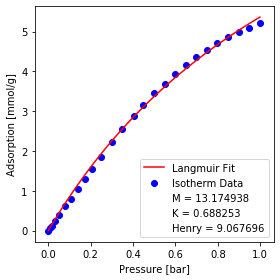

Optimization terminated successfully.
         Current function value: 0.001918
         Iterations: 19
         Function evaluations: 104
         Gradient evaluations: 26


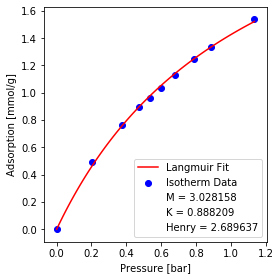

         Current function value: 11.658566
         Iterations: 30
         Function evaluations: 583
         Gradient evaluations: 143


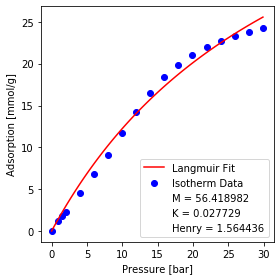

Optimization terminated successfully.
         Current function value: 0.470945
         Iterations: 13
         Function evaluations: 124
         Gradient evaluations: 31


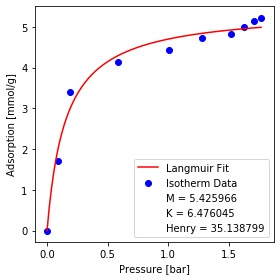

Optimization terminated successfully.
         Current function value: 1.208973
         Iterations: 12
         Function evaluations: 156
         Gradient evaluations: 39


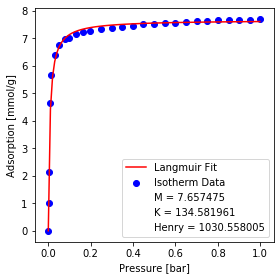

Optimization terminated successfully.
         Current function value: 4.140935
         Iterations: 20
         Function evaluations: 152
         Gradient evaluations: 38


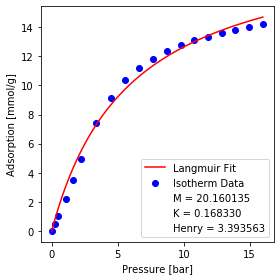

Optimization terminated successfully.
         Current function value: 0.003906
         Iterations: 29
         Function evaluations: 196
         Gradient evaluations: 49


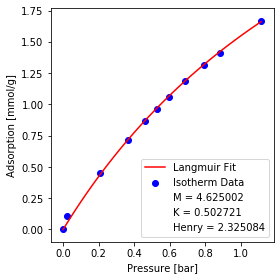

Optimization terminated successfully.
         Current function value: 0.173006
         Iterations: 13
         Function evaluations: 100
         Gradient evaluations: 25


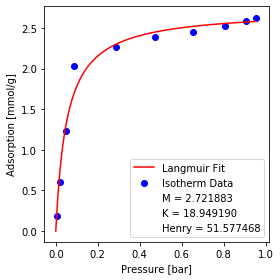

Optimization terminated successfully.
         Current function value: 5.923589
         Iterations: 14
         Function evaluations: 196
         Gradient evaluations: 49


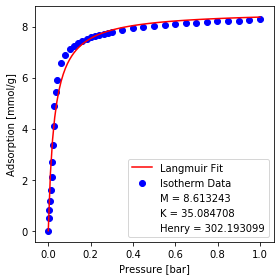

Optimization terminated successfully.
         Current function value: 1.657589
         Iterations: 16
         Function evaluations: 220
         Gradient evaluations: 55


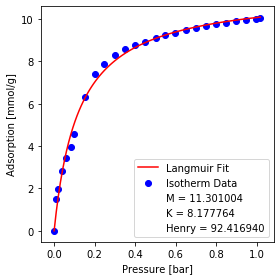

Optimization terminated successfully.
         Current function value: 0.091187
         Iterations: 10
         Function evaluations: 104
         Gradient evaluations: 26


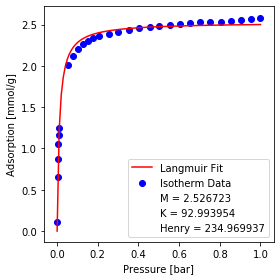

Optimization terminated successfully.
         Current function value: 4.974778
         Iterations: 14
         Function evaluations: 204
         Gradient evaluations: 51


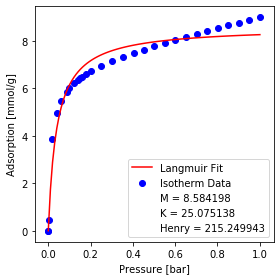

Optimization terminated successfully.
         Current function value: 3.914385
         Iterations: 14
         Function evaluations: 168
         Gradient evaluations: 42


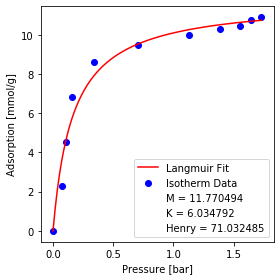

Optimization terminated successfully.
         Current function value: 1.054824
         Iterations: 18
         Function evaluations: 184
         Gradient evaluations: 46


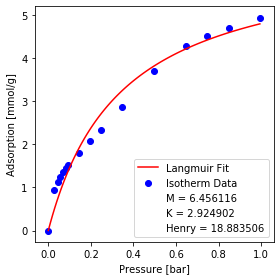

Optimization terminated successfully.
         Current function value: 4.155643
         Iterations: 21
         Function evaluations: 216
         Gradient evaluations: 54


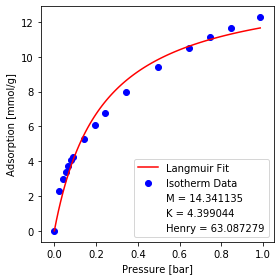

Optimization terminated successfully.
         Current function value: 0.373763
         Iterations: 8
         Function evaluations: 92
         Gradient evaluations: 23


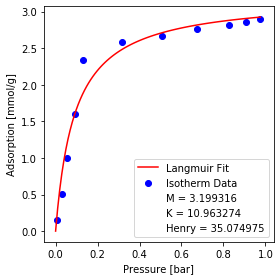

         Current function value: 1.918286
         Iterations: 22
         Function evaluations: 551
         Gradient evaluations: 135


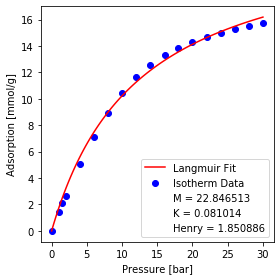

Optimization terminated successfully.
         Current function value: 0.005190
         Iterations: 64
         Function evaluations: 360
         Gradient evaluations: 90


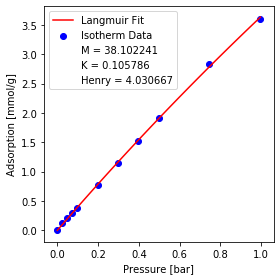

         Current function value: 0.000568
         Iterations: 400
         Function evaluations: 2020
         Gradient evaluations: 505


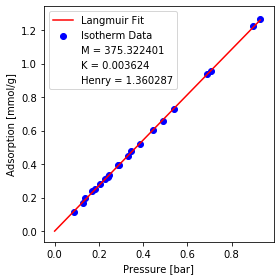

Optimization terminated successfully.
         Current function value: 0.772846
         Iterations: 6
         Function evaluations: 72
         Gradient evaluations: 18


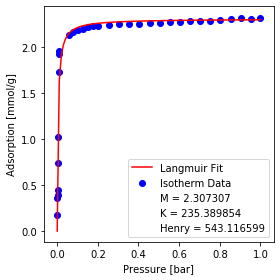

Optimization terminated successfully.
         Current function value: 0.106028
         Iterations: 23
         Function evaluations: 188
         Gradient evaluations: 47


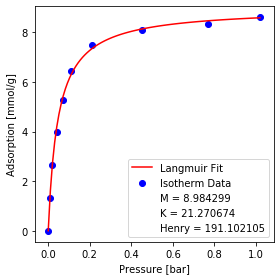

Optimization terminated successfully.
         Current function value: 0.001335
         Iterations: 12
         Function evaluations: 88
         Gradient evaluations: 22


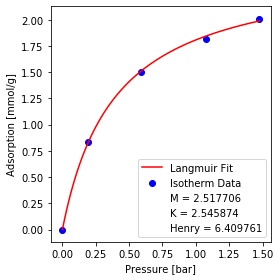

Optimization terminated successfully.
         Current function value: 0.043322
         Iterations: 12
         Function evaluations: 116
         Gradient evaluations: 29


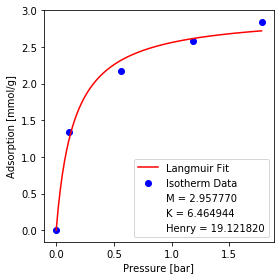

Optimization terminated successfully.
         Current function value: 2.820295
         Iterations: 20
         Function evaluations: 172
         Gradient evaluations: 43


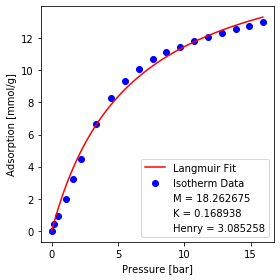

In [101]:
for file in files:
    henry = fit_langmuir(file, True)
    mofname = file.split('.')[0][:-8]
    gas = file.split('-')[-1].split('_')[0].lower() + '_'
    henries[gas + mofname]['langmuir'] = henry


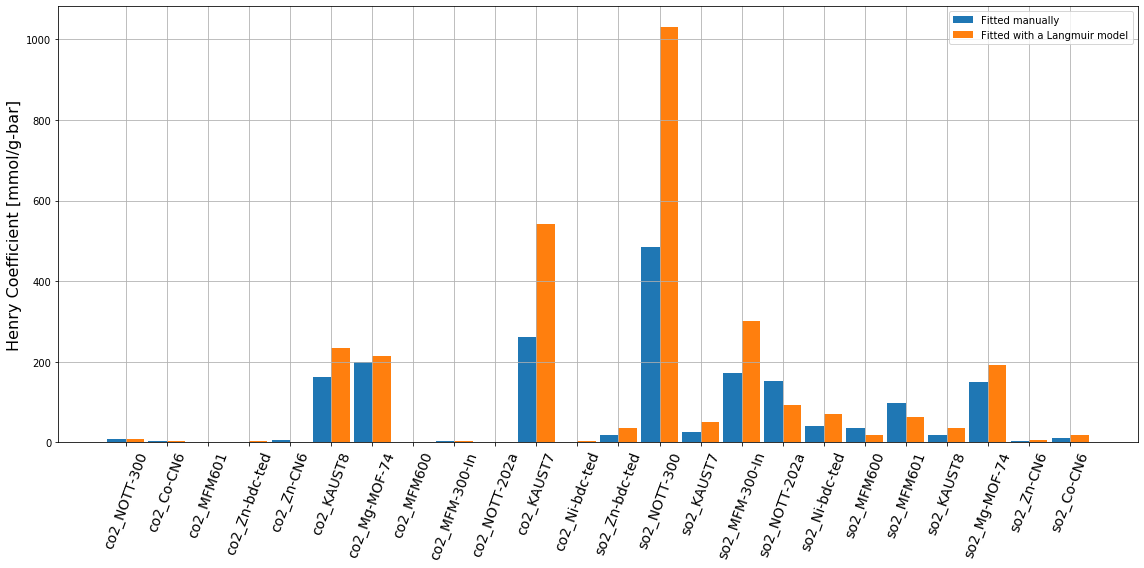

In [102]:
fig = plt.figure(figsize=(16,8))
names = []
manual = []
langmuir = []
for key in henries:
    names.append(key)
    manual.append(henries[key]['manual'])
    langmuir.append(henries[key]['langmuir'])

ind = np.arange(len(names))
width = 0.45
rects1 = plt.bar(ind-width/2, manual, width, label='Fitted manually')
rects2 = plt.bar(ind+width/2, langmuir, width, label='Fitted with a Langmuir model')
plt.legend()
ax = plt.gca()
ax.set_xticks(np.arange(len(names)))
ax.set_xticklabels(names, fontsize=14)
plt.xticks(rotation=70)
plt.ylabel('Henry Coefficient [mmol/g-bar]', fontsize=16)
plt.tight_layout()
plt.grid()

plt.show()